In [2]:
# generate linear data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# using the equation to solve a linear model
X_b = np.c_[np.ones((100, 1)), X] # adds a constant term. x0 = 1 for each X
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Theta (or Beta) = (X'X)^-1X'y
theta_best

array([[4.13945284],
       [2.8808047 ]])

In [4]:
# or with scikit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13945284]), array([[2.8808047]]))

In [5]:
#implementing gradient descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #compute partial derivatives of the cost function. In this case we are minimizing mean square error
    theta = theta - eta * gradients # once you know which way is up, go the other way. The amount depends on the learning rate

theta

array([[4.13945284],
       [2.8808047 ]])

In [6]:
# Stochastic gradient descent computes the gradient based on only one observation from the training date. 
# This makes it much faster, but also means it goes fairly randomly at each step, only on average decreasing cost.
# This does have the upside of making it less likely to get stuck at a local minima

# Gradient descent (stochastic or not) does require scaling the inputs. This is fine if your goal is prediction.


In [7]:
# an implementation of stochastic gradient descent

n_epochs = 50 # each round of m iterations is called an epoch
t0, t1 = 5, 50 #learning schedule - the learning rate starts out with large steps and then takes smaller ones
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range (n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.11561351],
       [2.87279585]])

In [9]:
#sci kit learn also has some preprocessing features
# for example, adding polynomial terms

#new data where this makes sense
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

#and can fit linear regression to new data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07058932]), array([[1.01166781, 0.49787141]]))

Learning Curves are a way to check on overfitting or underfitting of your model. (High degree polynomial linear regression will overfit the data)

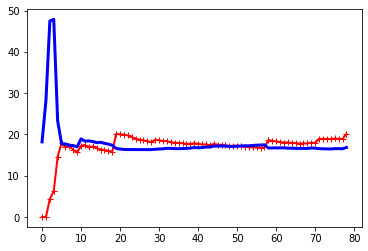

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], [] #empty lists
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) #fit on data up to state of current for loop
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-",  linewidth = 3, label = "val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

As we get more data to train on we get closer to the error rate of the validation set.

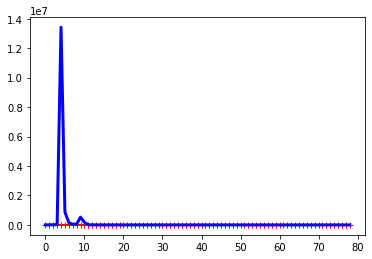

In [15]:
# What if we train on a 10th degree polynomial
# also going to use sklearn's pipeline idea

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

Can't really see it here without adjusting the axes. 

In [ ]:
#